In [1]:
import seaborn as sns
# 미리설정할것
# graph 관련 warning 이 나오지 않게 세팅하기
import warnings
warnings.filterwarnings(action='ignore')
#warning이 원래 기본 세팅으로 변경하기 (기본세팅 = warning 표시)
#warnings.filterwarnings(action='default')
#2. 한글 폰트 설정
# 시각화 모듈 임포트
import matplotlib.pyplot as plt
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
# font를 나눔고딕으로 세팅 'NanumGothic' - windows
#plt.rcParams['font.family'] = 'NanumGothic'
# 맑은고딕 - windows
#plt.rcParams['font.family'] = 'Malgun Gothic'
# 애플고딕 - Mac OS
#plt.rcParams['font.family'] = 'AppleGothic'

# 8-3 막대 그래프 - 집단 간 차이 표현하기
- 성별 소득 차이 처럼 집단 간 차이를 표시할 때 사용

## Lab 1:평균 막대 그래프 그리기
### 1. 집단별 평균표 만들기
구동방식(drv)별 고속도로 연비 평균 비교 그래프 만들기

In [2]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

In [3]:
#그룹에 사용하는 컬럼(변수)이 기본적으로 인덱스가 된다.
#컬럼(변수)을 인덱스로 생성하지 않기 위해서 'as_index=False' 사용
df_mpg = mpg.groupby('drv',as_index=False).agg(mean_hwy=('hwy','mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<Axes: xlabel='drv', ylabel='mean_hwy'>

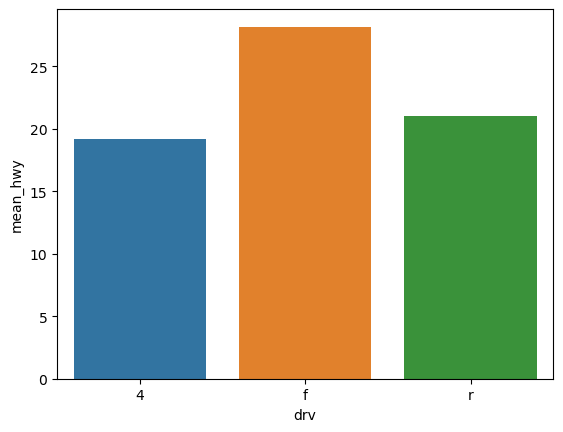

In [4]:
sns.barplot(data=df_mpg,x='drv',y='mean_hwy')

<Axes: xlabel='drv', ylabel='mean_hwy'>

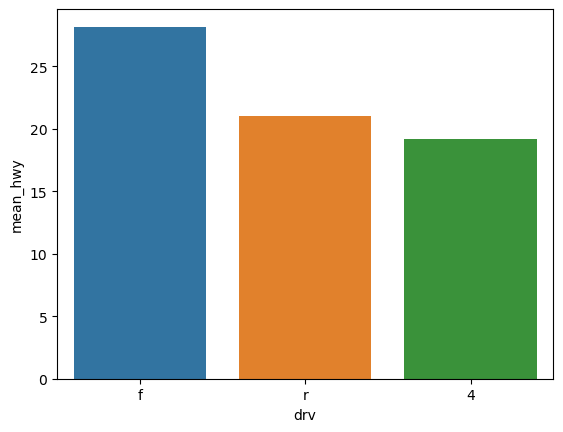

In [5]:
#크기 순위로 정렬
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)
sns.barplot(data=df_mpg,x='drv',y='mean_hwy')

## Lab 2: 빈도 막대 그래프 그리기
### 1. 집단별 빈도표 만들기
mpg 데이터에서 구동방식별 빈도표 만들기

In [6]:
#구동방식별 빈도표 만들기
#groupby를 하면 'drv'로 오름차순 정렬을 해준다.
df_mpg = mpg.groupby('drv',as_index=False).agg(count_drv=('drv','count'))
df_mpg

,drv,count_drv
0,4,103
1,f,106
2,r,25


<Axes: xlabel='drv', ylabel='count_drv'>

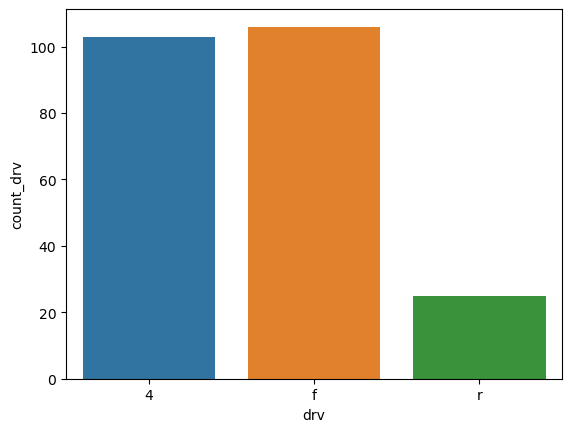

In [7]:
#구동 방식별 막대 그래프 만들기
sns.barplot(data=df_mpg,x='drv',y='count_drv')

<Axes: xlabel='drv', ylabel='count'>

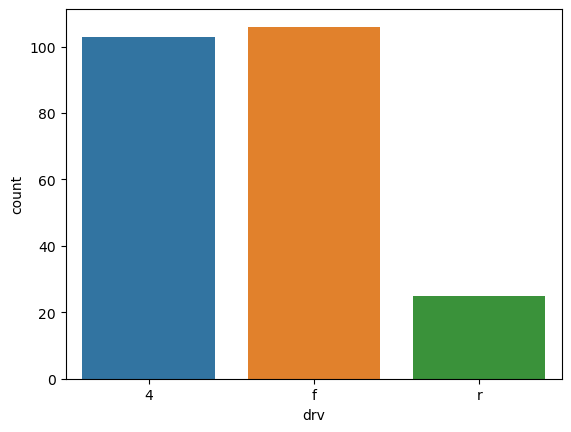

In [8]:
#sns.countplot()으로 빈도 막대 그래프 만들기
sns.countplot(data=mpg, x='drv',order=['4','f','r'])

### 2. index가 아닌 값의 내림차순으로 정리하는 방법을 찾아보자
'model'로 변수를 groupby를 하면 더 확실히 알 수 있다. 순서가 확실히 바뀐다

In [9]:
mpg[['model']].head(10)

,model
0,a4
1,a4
2,a4
3,a4
4,a4
5,a4
6,a4
7,a4 quattro
8,a4 quattro
9,a4 quattro


In [10]:
mpg['model'].unique()

array(['a4', 'a4 quattro', 'a6 quattro', 'c1500 suburban 2wd', 'corvette',
       'k1500 tahoe 4wd', 'malibu', 'caravan 2wd', 'dakota pickup 4wd',
       'durango 4wd', 'ram 1500 pickup 4wd', 'expedition 2wd',
       'explorer 4wd', 'f150 pickup 4wd', 'mustang', 'civic', 'sonata',
       'tiburon', 'grand cherokee 4wd', 'range rover', 'navigator 2wd',
       'mountaineer 4wd', 'altima', 'maxima', 'pathfinder 4wd',
       'grand prix', 'forester awd', 'impreza awd', '4runner 4wd',
       'camry', 'camry solara', 'corolla', 'land cruiser wagon 4wd',
       'toyota tacoma 4wd', 'gti', 'jetta', 'new beetle', 'passat'],
      dtype=object)

In [11]:
model_count_mpg=mpg.groupby('model',as_index=False).agg(model_count=('model','count'))
model_count_mpg

,model,model_count
0,4runner 4wd,6
1,a4,7
2,a4 quattro,8
3,a6 quattro,3
4,altima,6
5,c1500 suburban 2wd,5
6,camry,7
7,camry solara,7
8,caravan 2wd,11
9,civic,9


In [12]:
model_count_mpg['model'].unique()

array(['4runner 4wd', 'a4', 'a4 quattro', 'a6 quattro', 'altima',
       'c1500 suburban 2wd', 'camry', 'camry solara', 'caravan 2wd',
       'civic', 'corolla', 'corvette', 'dakota pickup 4wd', 'durango 4wd',
       'expedition 2wd', 'explorer 4wd', 'f150 pickup 4wd',
       'forester awd', 'grand cherokee 4wd', 'grand prix', 'gti',
       'impreza awd', 'jetta', 'k1500 tahoe 4wd',
       'land cruiser wagon 4wd', 'malibu', 'maxima', 'mountaineer 4wd',
       'mustang', 'navigator 2wd', 'new beetle', 'passat',
       'pathfinder 4wd', 'ram 1500 pickup 4wd', 'range rover', 'sonata',
       'tiburon', 'toyota tacoma 4wd'], dtype=object)

In [13]:
#자주 나오는 순서대로 정렬
mpg['model'].value_counts()

caravan 2wd               11
ram 1500 pickup 4wd       10
civic                      9
jetta                      9
dakota pickup 4wd          9
mustang                    9
impreza awd                8
a4 quattro                 8
grand cherokee 4wd         8
a4                         7
toyota tacoma 4wd          7
camry solara               7
camry                      7
tiburon                    7
sonata                     7
passat                     7
f150 pickup 4wd            7
durango 4wd                7
explorer 4wd               6
new beetle                 6
altima                     6
4runner 4wd                6
forester awd               6
gti                        5
c1500 suburban 2wd         5
corolla                    5
corvette                   5
malibu                     5
grand prix                 5
k1500 tahoe 4wd            4
pathfinder 4wd             4
mountaineer 4wd            4
range rover                4
maxima                     3
navigator 2wd 

In [14]:
mpg['model'].value_counts().index

Index(['caravan 2wd', 'ram 1500 pickup 4wd', 'civic', 'jetta',
       'dakota pickup 4wd', 'mustang', 'impreza awd', 'a4 quattro',
       'grand cherokee 4wd', 'a4', 'toyota tacoma 4wd', 'camry solara',
       'camry', 'tiburon', 'sonata', 'passat', 'f150 pickup 4wd',
       'durango 4wd', 'explorer 4wd', 'new beetle', 'altima', '4runner 4wd',
       'forester awd', 'gti', 'c1500 suburban 2wd', 'corolla', 'corvette',
       'malibu', 'grand prix', 'k1500 tahoe 4wd', 'pathfinder 4wd',
       'mountaineer 4wd', 'range rover', 'maxima', 'navigator 2wd',
       'a6 quattro', 'expedition 2wd', 'land cruiser wagon 4wd'],
      dtype='object')

<Axes: xlabel='model', ylabel='count'>

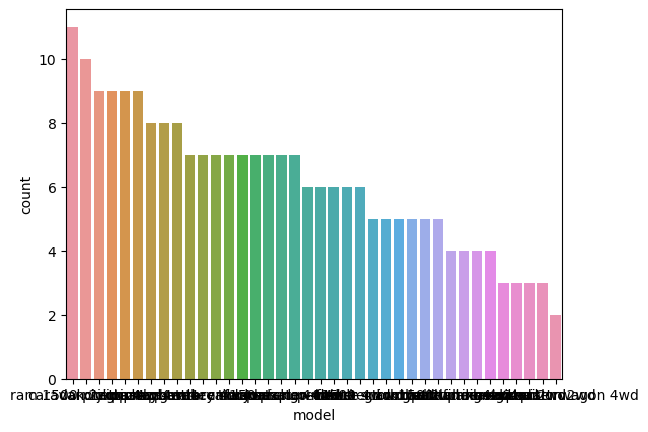

In [15]:
#sns.countplot()으로 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x='model',order=mpg['model'].value_counts().index)

<Axes: xlabel='model', ylabel='count'>

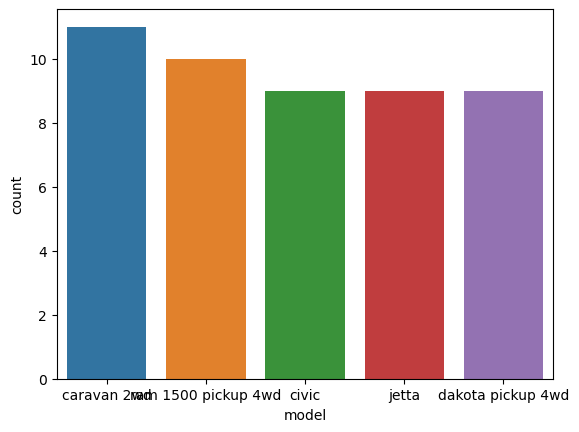

In [16]:
#갯수를 줄이고 싶으면 head()를 사용
sns.countplot(data = mpg, x='model',order=mpg['model'].value_counts().head(5).index)